In [1]:
import pandas as pd
#from predict_protein import download_cptac, select_features, train_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNetCV

In [15]:
import pandas as pd

# Assuming the file is named 'z_df.csv' and located in your current working directory
file_path = 'C:/Users/Borkana/Desktop/z_df.csv'

# Load the DataFrame from a CSV file
z_df = pd.read_csv(file_path, low_memory = False)

In [16]:
z_df

,Unnamed: 0.2,Patient_ID,A1BG_ENSG00000121410.12_transcriptomics,A1CF_ENSG00000148584.15_transcriptomics,A2M_ENSG00000175899.15_transcriptomics,A2ML1_ENSG00000166535.20_transcriptomics,A2MP1_ENSG00000256069.7_transcriptomics,A3GALT2_ENSG00000184389.9_transcriptomics,A4GALT_ENSG00000128274.17_transcriptomics,A4GNT_ENSG00000118017.4_transcriptomics,...,JMJD1C_ENSP00000491195.1_proteomics,FRY_ENSP00000494761.1_proteomics,DDX3X_ENSP00000494952.1_proteomics,DEPDC5_ENSP00000496252.1_proteomics,ALDOB_ENSP00000497216.1_proteomics,ALOX12B_ENSP00000497784.1_proteomics,CYSRT1_ENSP00000498316.1_proteomics,STRA8_ENSP00000499386.1_proteomics,BTD_ENSP00000500403.1_proteomics,MPZ_ENSP00000500814.2_proteomics
0,0,C3L-00006,-3.574908,0.769190,-0.510497,0.077341,-0.322334,0.627932,0.956024,0.620736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C3L-00008,-0.986643,0.050202,-0.331257,0.031938,0.401350,-0.914212,1.720486,-1.324910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,C3L-00032,-0.388280,0.060117,0.424109,1.100964,0.412483,-0.914212,1.372123,0.646911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,C3L-00084,-0.527434,-0.821051,1.307503,-1.251718,0.935762,0.614637,-1.579281,-0.321550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,C3L-00090,-1.348443,-0.358548,-0.356863,-1.061852,0.379082,-0.914212,-0.911586,0.463689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,105,C3N-04279,-0.009710,0.674519,-1.097704,-0.218041,2.406229,0.701093,1.761849,1.760646,...,0.161183,NaN,NaN,-0.033013,NaN,0.083810,-0.335804,NaN,-0.962613,0.413460
941,106,C3N-04280,0.334642,-0.448166,-0.119800,2.088504,0.250886,-0.629778,-1.521318,-1.804380,...,0.305935,NaN,NaN,-0.452802,NaN,2.379057,1.339790,NaN,-0.222527,-0.680166
942,107,C3N-04611,-1.214944,-0.780228,1.640426,-1.080531,0.512607,-0.629778,0.168265,0.572304,...,-0.284142,NaN,NaN,0.040529,NaN,-0.889757,-1.296715,NaN,-0.532485,-1.865813
943,108,C3N-02693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.357431,NaN,NaN,0.167386,NaN,-0.582981,-1.396636,0.478114,-0.367691,-2.137977


In [17]:
# Filter for columns that match the criteria
matching_columns = [col for col in z_df.columns if col.startswith('A1BG') and col.endswith('_proteomics')]

# Print the matching column names
print("Matching columns:", matching_columns)

Matching columns: ['A1BG_ENSP00000263100.2_proteomics', 'A1BG_ENSG00000121410.12_proteomics']


In [18]:
# Filter for columns that match the criteria
matching_columns = [col for col in z_df.columns if col.startswith('A1BG') and col.endswith('_proteomics')]

# Extract and display the DataFrame with these columns
proteomics_data = z_df[matching_columns]

# Print the resulting DataFrame
print(proteomics_data)

     A1BG_ENSP00000263100.2_proteomics  A1BG_ENSG00000121410.12_proteomics
0                            -1.121101                                 NaN
1                            -0.798504                                 NaN
2                            -0.577203                                 NaN
3                             1.612713                                 NaN
4                            -1.350755                                 NaN
..                                 ...                                 ...
940                          -0.701116                           26.973486
941                          -0.307991                           27.367141
942                          -0.167147                           27.504644
943                          -0.840944                                 NaN
944                                NaN                                 NaN

[945 rows x 2 columns]


In [2]:
import pandas as pd

# Assuming the file is named 'z_df.csv' and located in your current working directory
file_path = 'C:/Users/Borkana/z_df_cleaned.csv'

# Load the DataFrame from a CSV file
z_df_cleaned = pd.read_csv(file_path, low_memory = False)

In [16]:
import pandas as pd

# Load the Parquet file
file_path = 'C:/Users/Borkana/Desktop/z_df.parquet'  # Make sure to use the correct path
z_parquet = pd.read_parquet(file_path)

# Display the first few rows of the DataFrame
print(z_parquet.head())

OSError: Could not open Parquet input source '<Buffer>': Couldn't deserialize thrift: TProtocolException: Exceeded size limit


In [23]:
z_df

,Patient_ID,A1BG_ENSG00000121410.12_transcriptomics,A1CF_ENSG00000148584.15_transcriptomics,A2M_ENSG00000175899.15_transcriptomics,A2ML1_ENSG00000166535.20_transcriptomics,A2MP1_ENSG00000256069.7_transcriptomics,A3GALT2_ENSG00000184389.9_transcriptomics,A4GALT_ENSG00000128274.17_transcriptomics,A4GNT_ENSG00000118017.4_transcriptomics,AACS_ENSG00000081760.17_transcriptomics,...,JMJD1C_ENSP00000491195.1_proteomics,FRY_ENSP00000494761.1_proteomics,DDX3X_ENSP00000494952.1_proteomics,DEPDC5_ENSP00000496252.1_proteomics,ALDOB_ENSP00000497216.1_proteomics,ALOX12B_ENSP00000497784.1_proteomics,CYSRT1_ENSP00000498316.1_proteomics,STRA8_ENSP00000499386.1_proteomics,BTD_ENSP00000500403.1_proteomics,MPZ_ENSP00000500814.2_proteomics
0,C3L-00006,-3.574908,0.769190,-0.510497,0.077341,-0.322334,0.627932,0.956024,0.620736,0.733201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C3L-00008,-0.986643,0.050202,-0.331257,0.031938,0.401350,-0.914212,1.720486,-1.324910,1.052748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C3L-00032,-0.388280,0.060117,0.424109,1.100964,0.412483,-0.914212,1.372123,0.646911,1.585327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C3L-00084,-0.527434,-0.821051,1.307503,-1.251718,0.935762,0.614637,-1.579281,-0.321550,-0.986268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C3L-00090,-1.348443,-0.358548,-0.356863,-1.061852,0.379082,-0.914212,-0.911586,0.463689,-0.697154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,C3N-04279,-0.009710,0.674519,-1.097704,-0.218041,2.406229,0.701093,1.761849,1.760646,1.141896,...,0.161183,NaN,NaN,-0.033013,NaN,0.083810,-0.335804,NaN,-0.962613,0.413460
941,C3N-04280,0.334642,-0.448166,-0.119800,2.088504,0.250886,-0.629778,-1.521318,-1.804380,0.743022,...,0.305935,NaN,NaN,-0.452802,NaN,2.379057,1.339790,NaN,-0.222527,-0.680166
942,C3N-04611,-1.214944,-0.780228,1.640426,-1.080531,0.512607,-0.629778,0.168265,0.572304,-1.251352,...,-0.284142,NaN,NaN,0.040529,NaN,-0.889757,-1.296715,NaN,-0.532485,-1.865813
943,C3N-02693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.357431,NaN,NaN,0.167386,NaN,-0.582981,-1.396636,0.478114,-0.367691,-2.137977


In [13]:
# Filter for columns that match the criteria
matching_columns = [col for col in z_df.columns if col.startswith('A1BG') and col.endswith('_proteomics')]

# Print the matching column names
print("Matching columns:", matching_columns)

NameError: name 'z_df' is not defined

In [14]:
# Assuming 'z_df' is your DataFrame
z_df = z_df.drop(z_df.columns[[0]], axis=1)

NameError: name 'z_df' is not defined

In [3]:
import sys

# Add the path to sys.path
predict_protein_path = 'C:\\Users\\borkana\\CPTAC_Protein\\predict_protein'
sys.path.append(predict_protein_path)

# Now you can import the modules
try:
    from download_cptac import *
except ImportError as e:
    print(f"An error occurred with download_cptac import: {e}")

try:
    from select_features import *

except ImportError as e:
    print(f"An error occurred with select_features import: {e}")

try:
    from train_model import *
except ImportError as e:
    print(f"An error occurred with train_model import: {e}")


In [5]:
# List all columns in z_df that contain 'A1BG'
a1bg_columns = [col for col in z_df.columns if 'A1BG' in col]

# Print the found columns
print("Columns containing 'A1BG':")
for col in a1bg_columns:
    print(col)

Columns containing 'A1BG':
A1BG_ENSG00000121410.12_transcriptomics
A1BG_ENSP00000263100.2_proteomics
A1BG_ENST00000263100.8_ENSG00000121410.12_transcriptomics
A1BG_ENST00000595014.1_ENSG00000121410.12_transcriptomics
A1BG_ENST00000596924.1_ENSG00000121410.12_transcriptomics
A1BG_ENST00000598345.1_ENSG00000121410.12_transcriptomics
A1BG_ENST00000600966.1_ENSG00000121410.12_transcriptomics
A1BG_ENSG00000121410.10_transcriptomics
A1BG_ENSG00000121410.12_proteomics


In [24]:
non_coding_df

,Patient_ID,A1BG_ENSG00000121410.12_transcriptomics,A1CF_ENSG00000148584.15_transcriptomics,A2M_ENSG00000175899.15_transcriptomics,A2ML1_ENSG00000166535.20_transcriptomics,A2MP1_ENSG00000256069.7_transcriptomics,A3GALT2_ENSG00000184389.9_transcriptomics,A4GALT_ENSG00000128274.17_transcriptomics,A4GNT_ENSG00000118017.4_transcriptomics,AACS_ENSG00000081760.17_transcriptomics,...,JMJD1C_ENSP00000491195.1_proteomics,FRY_ENSP00000494761.1_proteomics,DDX3X_ENSP00000494952.1_proteomics,DEPDC5_ENSP00000496252.1_proteomics,ALDOB_ENSP00000497216.1_proteomics,ALOX12B_ENSP00000497784.1_proteomics,CYSRT1_ENSP00000498316.1_proteomics,STRA8_ENSP00000499386.1_proteomics,BTD_ENSP00000500403.1_proteomics,MPZ_ENSP00000500814.2_proteomics
0,C3L-00006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C3L-00008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C3L-00032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C3L-00084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C3L-00090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,C3N-04279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,C3N-04280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,C3N-04611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,C3N-02693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import pandas as pd

# Define the path to the non-coding columns file
file_path = 'D:/Aidan/z_df_non_coding_columns.csv'

# Load the DataFrame
try:
    non_coding_df = pd.read_csv(file_path, low_memory=False)
    print("Non-coding columns DataFrame loaded successfully.")
    print("Displaying the first few rows of the non-coding columns DataFrame:")
    print(non_coding_df.head())
    
    # Optional: Check for specific columns related to 'A1BG' to see if any are present
    a1bg_non_coding_columns = [col for col in non_coding_df.columns if 'A1BG' in col]
    if a1bg_non_coding_columns:
        print("A1BG related non-coding columns found:")
        for col in a1bg_non_coding_columns:
            print(col)
    else:
        print("No A1BG related non-coding columns found.")
    
except Exception as e:
    print(f"Failed to load non-coding columns DataFrame: {e}")

Non-coding columns DataFrame loaded successfully.
Displaying the first few rows of the non-coding columns DataFrame:
  Patient_ID  A1BG_ENSG00000121410.12_transcriptomics  \
0  C3L-00006                                      NaN   
1  C3L-00008                                      NaN   
2  C3L-00032                                      NaN   
3  C3L-00084                                      NaN   
4  C3L-00090                                      NaN   

   A1CF_ENSG00000148584.15_transcriptomics  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   A2M_ENSG00000175899.15_transcriptomics  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     

In [29]:
#we should collapse on the gene level and retain the latest versions for both proteins and transcripts
import pandas as pd

# Function to extract gene name and version number from column names
def parse_column_name_version(col_name):
    parts = col_name.split('_')
    if 'ENST' in col_name or 'ENSP' in col_name:
        gene_name = parts[0]
        version_info = parts[1].split('.')
        if len(version_info) == 2:
            version = float(version_info[1])
        else:
            version = 0  # Default to 0 if no version number
    else:
        gene_name = '_'.join(parts[:-1])  # If no ENST or ENSP, the gene name is the whole part except the last
        version = 0
    return gene_name, version

# Function to select the highest version for each gene
def select_highest_version(df, data_type):
    version_info = []
    for col in df.columns:
        if data_type in col:
            gene_name, version = parse_column_name_version(col)
            version_info.append((gene_name, version, col))

    version_df = pd.DataFrame(version_info, columns=['Gene', 'Version', 'Column'])
    latest_versions = version_df.loc[version_df.groupby('Gene')['Version'].idxmax()]

    # Extract the column names for the latest version and subset the DataFrame
    latest_columns = latest_versions['Column'].tolist()
    return df[latest_columns], latest_versions  # Return both the subsetted DataFrame and the versions info

# Load z_df from the CSV file
z_df = pd.read_csv('D:/Aidan/z_df.csv', low_memory=False)

# Apply the function to select the highest version for _transcriptomics and _proteomics
z_df_latest_transcriptomics, transcriptomics_versions = select_highest_version(z_df, '_transcriptomics')
z_df_latest_proteomics, proteomics_versions = select_highest_version(z_df, '_proteomics')

# Combine the latest transcriptomics and proteomics data
z_df_latest = pd.concat([z_df_latest_transcriptomics, z_df_latest_proteomics], axis=1)

# Save the final DataFrame
z_df_latest.to_csv('D:/Aidan/z_df_latest.csv', index=False)
print(f"Final DataFrame with latest versions saved to 'D:/Aidan/z_df_latest.csv'.")

# Optionally, save the versions information
transcriptomics_versions.to_csv('D:/Aidan/transcriptomics_versions.csv', index=False)
proteomics_versions.to_csv('D:/Aidan/proteomics_versions.csv', index=False)

Final DataFrame with latest versions saved to 'D:/Aidan/z_df_latest.csv'.


In [23]:
from dask.distributed import Client

# Start a local Dask client
client = Client()  # This starts a local scheduler and worker
print("Dashboard available at:", client.dashboard_link)

C:\Users\borkana\AppData\Local\anaconda3\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55093 instead
  warnings.warn(


Dashboard available at: http://127.0.0.1:55093/status


In [5]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import time
import re

# Compile the pattern to extract the main identifier, the gene type (ENSG or ENSP), and the version number
pattern = re.compile(r"(.*?)_(ENS[GP]\d+)\.(\d+)_(transcriptomics|proteomics)")

def extract_info(col_name):
    match = pattern.match(col_name)
    if match:
        identifier = match.group(1)
        gene_type = match.group(2)
        version = int(match.group(3))
        data_type = match.group(4)  # 'transcriptomics' or 'proteomics'
        return (identifier, gene_type, version, data_type)
    return None

def get_highest_versions(df):
    versions = {}
    for col in df.columns:
        info = extract_info(col)
        if info:
            identifier, gene_type, version, data_type = info
            key = (identifier, gene_type, data_type)  # Key by identifier, gene type, and data type
            if key not in versions or versions[key][1] < version:
                versions[key] = (col, version)
    return versions

# Assume z_df is a loaded Dask DataFrame
z_df_copy = z_df.copy()

# Start timing
start_time = time.time()

# Calculate highest versions on the full dataset
versions = get_highest_versions(z_df_copy)
highest_columns = [info[0] for info in versions.values()]
z_df_filtered = z_df_copy[highest_columns]

# Repartition to a single partition for single file output
z_df_filtered = z_df_filtered.repartition(npartitions=1)

# Define the path for saving the output
output_path = 'D:/Aidan/z_df_highest_versions.csv'

# Execute with progress bar and measure time
with ProgressBar():
    z_df_filtered.to_csv(output_path, index=False)

# End timing
end_time = time.time()

# Print out the total computation time
print(f"Highest version columns are saved to '{output_path}'.")
print(f"Total computation time: {end_time - start_time} seconds")

AttributeError: 'DataFrame' object has no attribute 'repartition'

In [13]:
#Note:this actually works
import pandas as pd


# Set 'Patient_ID' as the index if it's a column in the DataFrame
if 'Patient_ID' in z_df.columns:
    z_df.set_index('Patient_ID', inplace=True)

def parse_column_name_version(col_name):
    parts = col_name.split('_')
    if 'ENST' in parts[1] or 'ENSP' in parts[1]:
        gene_name = parts[0]
        version_info = parts[2].split('.')
    elif 'ENSG' in parts[1]:
        gene_name = parts[0]
        version_info = parts[1].split('.')
    else:
        gene_name = '_'.join(parts[:-1])  # For entries not following the expected pattern
        version_info = parts[-1].split('.')

    version = float(version_info[1]) if len(version_info) == 2 else 0
    return gene_name, version

def select_highest_version(df, data_type):
    version_info = []
    for col in df.columns:
        if data_type in col:
            gene_name, version = parse_column_name_version(col)
            version_info.append((gene_name, version, col))

    version_df = pd.DataFrame(version_info, columns=['Gene', 'Version', 'Column'])
    latest_versions = version_df.loc[version_df.groupby('Gene')['Version'].idxmax()]
    latest_columns = latest_versions['Column'].tolist()
    return df[latest_columns], latest_versions

# Apply the function to select the highest version for _transcriptomics and _proteomics
z_df_latest_transcriptomics, transcriptomics_versions = select_highest_version(z_df, '_transcriptomics')
z_df_latest_proteomics, proteomics_versions = select_highest_version(z_df, '_proteomics')

# Combine the latest transcriptomics and proteomics data
z_df_latest = pd.concat([z_df_latest_transcriptomics, z_df_latest_proteomics], axis=1)

# Ensure index is retained in the final DataFrame
z_df_latest.index = z_df.index

# Save the final DataFrame
z_df_latest.to_csv('D:/Aidan/z_df_latest.csv', index=True)
print(f"Final DataFrame with latest versions saved to 'D:/Aidan/z_df_latest.csv'.")

# Optionally, save the versions information
transcriptomics_versions.to_csv('D:/Aidan/transcriptomics_versions.csv', index=True)
proteomics_versions.to_csv('D:/Aidan/proteomics_versions.csv', index=True)

Final DataFrame with latest versions saved to 'D:/Aidan/z_df_latest.csv'.


In [14]:
z_df_latest

,5S_rRNA_ENSG00000201285.1_transcriptomics,5S_rRNA_ENSG00000212595.1_transcriptomics,5S_rRNA_ENSG00000252830.2_transcriptomics,5S_rRNA_ENSG00000271924.1_transcriptomics,5S_rRNA_ENSG00000272253.1_transcriptomics,5S_rRNA_ENSG00000272351.1_transcriptomics,5S_rRNA_ENSG00000272435.1_transcriptomics,5S_rRNA_ENSG00000274059.1_transcriptomics,5S_rRNA_ENSG00000274097.1_transcriptomics,5S_rRNA_ENSG00000274164.1_transcriptomics,...,ZSWIM8_ENSG00000214655.10_proteomics,ZSWIM9_ENSG00000185453.13_proteomics,ZUP1_ENSG00000153975.10_proteomics,ZW10_ENSG00000086827.9_proteomics,ZWILCH_ENSG00000174442.12_proteomics,ZWINT_ENSG00000122952.17_proteomics,ZXDC_ENSG00000070476.15_proteomics,ZYG11B_ENSG00000162378.13_proteomics,ZYX_ENSG00000159840.16_proteomics,ZZEF1_ENSG00000074755.15_proteomics
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-0.303820,-0.230921,-0.351096,-0.306139,0.841956,0.146538,-0.433465,-0.176356,-0.686505,0.854822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00008,0.517315,-0.230921,-0.761734,-0.306139,0.532413,2.894120,-0.433465,-0.176356,-0.624344,0.207370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00032,-0.303820,-0.230921,-0.761734,-0.306139,-0.396215,-0.311393,-0.433465,-0.176356,2.371812,2.084981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00090,-0.303820,-0.230921,-0.761734,1.263805,0.222871,-0.311393,-0.433465,-0.176356,0.183748,0.318362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04279,0.000000,0.000000,-0.096674,0.971367,-0.010909,-0.460716,-0.136821,-0.096674,-0.252657,0.734548,...,24.313859,NaN,NaN,24.358177,23.400490,NaN,19.931953,22.071694,27.038479,24.194449
C3N-04280,0.000000,0.000000,-0.096674,-1.914437,-1.126351,-0.460716,-0.136821,-0.096674,-0.252657,-0.346288,...,24.435414,NaN,NaN,24.691304,22.786126,NaN,19.016381,22.317546,27.368559,24.108001
C3N-04611,0.000000,0.000000,-0.096674,0.606000,-0.454453,-0.460716,-0.136821,-0.096674,-0.252657,-0.346288,...,24.107052,NaN,NaN,24.356067,22.458737,18.742359,19.059506,21.925523,27.638575,24.018759


In [15]:

# Filter columns specifically for those containing 'A1BG' in the column name
a1bg_columns = [col for col in z_df_latest.columns if 'A1BG' in col]

# Print all columns containing 'A1BG'
print("Columns containing 'A1BG':")
print(a1bg_columns)

# Display the head of the DataFrame for columns containing 'A1BG'
print("Data for columns containing 'A1BG':")
print(z_df_latest[a1bg_columns].head())

Columns containing 'A1BG':
['A1BG_ENSG00000121410.12_transcriptomics', 'A1BG_ENSG00000121410.12_proteomics']
Data for columns containing 'A1BG':
            A1BG_ENSG00000121410.12_transcriptomics  \
Patient_ID                                            
C3L-00006                                 -3.574908   
C3L-00008                                 -0.986643   
C3L-00032                                 -0.388280   
C3L-00084                                 -0.527434   
C3L-00090                                 -1.348443   

            A1BG_ENSG00000121410.12_proteomics  
Patient_ID                                      
C3L-00006                                  NaN  
C3L-00008                                  NaN  
C3L-00032                                  NaN  
C3L-00084                                  NaN  
C3L-00090                                  NaN  


In [27]:
#make a transcript variants version
# Extract all ENST columns for transcript variants
transcript_variants_columns = [col for col in z_df.columns if 'ENST' in col]

# Store all transcript variant columns in a separate DataFrame
z_df_transcript_variants = z_df[transcript_variants_columns]

In [21]:
import pandas as pd

# Assuming z_df_latest is already loaded into your environment

# Function to count columns with the same gene identifier and data type
def count_gene_variants(df):
    gene_count = {}
    for col in df.columns:
        # Split the column name and remove version number
        parts = col.split('_')
        gene_key = '_'.join(parts[:2] + parts[-1:])  # Join the first two parts and the last part
        if gene_key in gene_count:
            gene_count[gene_key] += 1
        else:
            gene_count[gene_key] = 1
    return gene_count

# Apply the function
gene_variants_count = count_gene_variants(z_df_latest)

# Print counts for genes with multiple columns/versions
for gene, count in gene_variants_count.items():
    if count > 1:
        print(f"{gene}: {count} columns")

5S_rRNA_transcriptomics: 26 columns
5_8S_transcriptomics: 2 columns
ACEA_U3_transcriptomics: 3 columns
DLEU2_1_transcriptomics: 2 columns
DLEU2_2_transcriptomics: 2 columns
DLEU2_3_transcriptomics: 2 columns
DLEU2_4_transcriptomics: 2 columns
DLEU2_5_transcriptomics: 2 columns
DLEU2_6_transcriptomics: 3 columns
H19_3_transcriptomics: 2 columns
MIAT_exon5_transcriptomics: 3 columns
Metazoa_SRP_transcriptomics: 306 columns
RP1-213J1P__transcriptomics: 2 columns
RP1-232L22__transcriptomics: 2 columns
RP11-1157N2__transcriptomics: 3 columns
RP11-293G6__transcriptomics: 3 columns
RP11-4K3__transcriptomics: 2 columns
RP11-59D5__transcriptomics: 2 columns
Y_RNA_transcriptomics: 782 columns
ZEB2_AS1_transcriptomics: 3 columns
snoU2_19_transcriptomics: 4 columns
uc_338_transcriptomics: 36 columns


In [30]:
z_df_latest

,5S_rRNA_ENSG00000201285.1_transcriptomics,5S_rRNA_ENSG00000212595.1_transcriptomics,5S_rRNA_ENSG00000252830.2_transcriptomics,5S_rRNA_ENSG00000271924.1_transcriptomics,5S_rRNA_ENSG00000272253.1_transcriptomics,5S_rRNA_ENSG00000272351.1_transcriptomics,5S_rRNA_ENSG00000272435.1_transcriptomics,5S_rRNA_ENSG00000274059.1_transcriptomics,5S_rRNA_ENSG00000274097.1_transcriptomics,5S_rRNA_ENSG00000274164.1_transcriptomics,...,ZWINT_ENSP00000363055.3_proteomics,ZWINT_ENSG00000122952.17_proteomics,ZXDC_ENSP00000337694.5_proteomics,ZXDC_ENSG00000070476.15_proteomics,ZYG11B_ENSP00000294353.6_proteomics,ZYG11B_ENSG00000162378.13_proteomics,ZYX_ENSP00000324422.5_proteomics,ZYX_ENSG00000159840.16_proteomics,ZZEF1_ENSP00000371051.2_proteomics,ZZEF1_ENSG00000074755.15_proteomics
0,-0.103142,0.0,0.000000,1.817685,-0.428132,-0.009510,-0.334268,0.000000,-0.670719,-0.322040,...,NaN,NaN,NaN,NaN,-0.282690,NaN,-1.249640,NaN,-0.021507,NaN
1,-0.103142,0.0,0.000000,0.982808,-0.510267,-0.871454,-0.334268,0.000000,-0.670719,-0.322040,...,1.166619,NaN,NaN,NaN,0.018618,NaN,-0.906299,NaN,-0.020502,NaN
2,-0.103142,0.0,0.000000,0.325316,-1.393383,-0.871454,-0.334268,0.000000,0.353561,-0.322040,...,NaN,NaN,NaN,NaN,-0.077076,NaN,-0.898159,NaN,0.331281,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.961958,NaN,NaN,NaN,0.178987,NaN,-1.104936,NaN,-0.355299,NaN
4,-0.103142,0.0,0.000000,0.050467,0.127413,-0.871454,-0.334268,0.000000,1.746312,-0.322040,...,0.258058,NaN,NaN,NaN,-0.089493,NaN,-1.458058,NaN,0.054244,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,0.000000,0.0,-0.096674,0.971367,-0.010909,-0.460716,-0.136821,-0.096674,-0.252657,0.734548,...,NaN,NaN,NaN,19.931953,0.086828,22.071693,-0.376668,27.038479,0.192882,24.194448
941,0.000000,0.0,-0.096674,-1.914437,-1.126351,-0.460716,-0.136821,-0.096674,-0.252657,-0.346288,...,NaN,NaN,NaN,19.016382,0.330077,22.317547,-0.048010,27.368559,0.099170,24.108002
942,0.000000,0.0,-0.096674,0.606000,-0.454453,-0.460716,-0.136821,-0.096674,-0.252657,-0.346288,...,0.105692,18.74236,NaN,19.059505,-0.066031,21.925524,0.227206,27.638575,0.010090,24.018759
943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.267438,NaN,0.040135,NaN,-0.027477,NaN


In [43]:
z_df_highest

,A1BG_ENST00000263100.8_ENSG00000121410.12_transcriptomics,A1BG-AS1_ENST00000593374.5_ENSG00000268895.6_transcriptomics,A1CF_ENST00000373997.8_ENSG00000148584.15_transcriptomics,A2M_ENST00000318602.12_ENSG00000175899.15_transcriptomics,A2M-AS1_ENST00000499762.2_ENSG00000245105.4_transcriptomics,A2ML1_ENST00000299698.12_ENSG00000166535.20_transcriptomics,A2ML1-AS1_ENST00000537288.1_ENSG00000256661.1_transcriptomics,A2ML1-AS2_ENST00000394240.3_ENSG00000256904.1_transcriptomics,A2MP1_ENST00000566278.6_ENSG00000256069.7_transcriptomics,A3GALT2_ENST00000442999.3_ENSG00000184389.9_transcriptomics,...,PERM1_ENSP00000414022.3_proteomics,PRB1_ENSP00000420826.2_proteomics,TRIML2_ENSP00000422581.2_proteomics,CCDC175_ENSP00000452964.1_proteomics,ZNF578_ENSP00000459216.1_proteomics,MT1HL1_ENSP00000476141.1_proteomics,ATG9B_ENSP00000479879.1_proteomics,TLX2_ENSP00000482690.1_proteomics,FAM240B_ENSP00000490097.1_proteomics,ALOX12B_ENSP00000497784.1_proteomics
0,-0.308263,-0.100504,-0.152440,-0.876361,-0.217560,-0.297014,-0.435960,-0.174800,-0.320358,0.047573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.308263,-0.100504,-0.152440,-1.180231,-0.837388,-0.333313,-0.435960,-0.174800,-0.320358,-0.632039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.308263,-0.100504,-0.152440,-0.152975,-0.837388,0.059383,-0.435960,-0.174800,-0.320358,-0.632039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.618380,-0.100504,-0.152440,-0.658616,-0.341525,-0.349813,-0.435960,-0.174800,-0.320358,-0.632039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,-0.227921,0.000000,-0.096674,-0.977207,-0.731725,-0.481110,-0.348649,-0.348723,2.854595,0.415508,...,-1.018623,NaN,NaN,-0.183227,NaN,NaN,NaN,NaN,NaN,0.083810
941,-0.227921,0.000000,-0.096674,-1.124389,-0.731725,3.380661,-0.348649,-0.348723,-0.262132,-0.500306,...,-0.236566,NaN,NaN,-0.356400,NaN,NaN,NaN,NaN,NaN,2.379057
942,-0.227921,0.000000,-0.096674,1.068291,-0.443833,-0.698198,-0.348649,1.172979,-0.002405,-0.500306,...,NaN,NaN,NaN,-0.388761,NaN,NaN,NaN,NaN,1.566099,-0.889757
943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.919167,NaN,-0.870649,NaN,0.065416,NaN,NaN,NaN,-0.582981


In [28]:
z_df_transcript_variants.to_csv

<bound method NDFrame.to_csv of      A1BG_ENST00000263100.8_ENSG00000121410.12_transcriptomics  \
0                                            -0.869304           
1                                            -0.869304           
2                                            -0.869304           
3                                                  NaN           
4                                            -0.869304           
..                                                 ...           
940                                          -0.227921           
941                                          -0.227921           
942                                          -0.227921           
943                                                NaN           
944                                                NaN           

     A1BG_ENST00000595014.1_ENSG00000121410.12_transcriptomics  \
0                                            -0.388700           
1                                          

In [16]:
import pandas as pd

# Assuming z_df is your original DataFrame

# Function to simplify column names
def simplify_column_name(col_name):
    # Split the column name by '_'
    parts = col_name.split('_')
    # Return the concatenated string of the first part and the last part
    return '_'.join([parts[0], parts[-1]])

# Create a new DataFrame with the simplified column names
z_df_fixed = z_df_latest.copy()
z_df_fixed.columns = [simplify_column_name(col) for col in z_df_latest.columns]

In [17]:
z_df_fixed

,5S_transcriptomics,5S_transcriptomics,5S_transcriptomics,5S_transcriptomics,5S_transcriptomics,5S_transcriptomics,5S_transcriptomics,5S_transcriptomics,5S_transcriptomics,5S_transcriptomics,...,ZSWIM8_proteomics,ZSWIM9_proteomics,ZUP1_proteomics,ZW10_proteomics,ZWILCH_proteomics,ZWINT_proteomics,ZXDC_proteomics,ZYG11B_proteomics,ZYX_proteomics,ZZEF1_proteomics
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-0.303820,-0.230921,-0.351096,-0.306139,0.841956,0.146538,-0.433465,-0.176356,-0.686505,0.854822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00008,0.517315,-0.230921,-0.761734,-0.306139,0.532413,2.894120,-0.433465,-0.176356,-0.624344,0.207370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00032,-0.303820,-0.230921,-0.761734,-0.306139,-0.396215,-0.311393,-0.433465,-0.176356,2.371812,2.084981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00090,-0.303820,-0.230921,-0.761734,1.263805,0.222871,-0.311393,-0.433465,-0.176356,0.183748,0.318362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04279,0.000000,0.000000,-0.096674,0.971367,-0.010909,-0.460716,-0.136821,-0.096674,-0.252657,0.734548,...,24.313859,NaN,NaN,24.358177,23.400490,NaN,19.931953,22.071694,27.038479,24.194449
C3N-04280,0.000000,0.000000,-0.096674,-1.914437,-1.126351,-0.460716,-0.136821,-0.096674,-0.252657,-0.346288,...,24.435414,NaN,NaN,24.691304,22.786126,NaN,19.016381,22.317546,27.368559,24.108001
C3N-04611,0.000000,0.000000,-0.096674,0.606000,-0.454453,-0.460716,-0.136821,-0.096674,-0.252657,-0.346288,...,24.107052,NaN,NaN,24.356067,22.458737,18.742359,19.059506,21.925523,27.638575,24.018759


In [40]:
def check_standard_scaling(df):
    means = df.mean()
    stds = df.std()
    print("Means of features:\n", means)
    print("Standard deviations of features:\n", stds)

# Check standard scaling for z_df_fixed
check_standard_scaling(z_df_fixed)

Means of features:
 5S_transcriptomics    1.101071e-10
5S_transcriptomics   -3.119701e-10
5S_transcriptomics    2.385654e-10
5S_transcriptomics   -1.835119e-10
5S_transcriptomics    3.394968e-10
                          ...     
ZWINT_proteomics      2.106688e+01
ZXDC_proteomics       2.002435e+01
ZYG11B_proteomics     2.233926e+01
ZYX_proteomics        2.804529e+01
ZZEF1_proteomics      2.460974e+01
Length: 97797, dtype: float64
Standard deviations of features:
 5S_transcriptomics    0.351147
5S_transcriptomics    0.351147
5S_transcriptomics    0.506432
5S_transcriptomics    1.000616
5S_transcriptomics    1.000616
                        ...   
ZWINT_proteomics      1.351382
ZXDC_proteomics       1.124030
ZYG11B_proteomics     1.055706
ZYX_proteomics        0.569801
ZZEF1_proteomics      0.467949
Length: 97797, dtype: float64


In [41]:
def check_robust_scaling(df):
    medians = df.median()
    iqr = df.quantile(0.75) - df.quantile(0.25)
    print("Medians of features:\n", medians)
    print("Interquartile ranges (IQRs) of features:\n", iqr)

# Check robust scaling for z_df_fixed
check_robust_scaling(z_df_fixed)

Medians of features:
 5S_transcriptomics     0.000000
5S_transcriptomics     0.000000
5S_transcriptomics     0.000000
5S_transcriptomics    -0.242273
5S_transcriptomics    -0.259226
                        ...    
ZWINT_proteomics      21.239605
ZXDC_proteomics       19.843616
ZYG11B_proteomics     22.376836
ZYX_proteomics        28.034670
ZZEF1_proteomics      24.593975
Length: 97797, dtype: float64
Interquartile ranges (IQRs) of features:
 5S_transcriptomics    0.000000
5S_transcriptomics    0.000000
5S_transcriptomics    0.000000
5S_transcriptomics    1.109851
5S_transcriptomics    0.542046
                        ...   
ZWINT_proteomics      1.290847
ZXDC_proteomics       1.211005
ZYG11B_proteomics     0.818441
ZYX_proteomics        0.898180
ZZEF1_proteomics      0.609930
Length: 97797, dtype: float64


In [20]:
import pandas as pd

# Assuming 'z_df_cleaned' is already loaded into your environment
# Let's list all columns that contain 'PCCB'
pccb_columns = [col for col in z_df_cleaned.columns if 'ZNF92' in col]
print("Columns containing 'PCCB':", pccb_columns)

Columns containing 'PCCB': ['ZNF92_proteomics', 'ZNF92_transcriptomics', 'ZNF92P3_transcriptomics', 'ZNF92P1Y_transcriptomics', 'ZNF92P2_transcriptomics']


In [21]:
tm = LearnCPTAC(z_df_cleaned)
# This should set the method to use a RandomForestRegressor
tm.train_method = 'forest'  
result = tm.learn_one_protein(protein_to_do='PCCB')

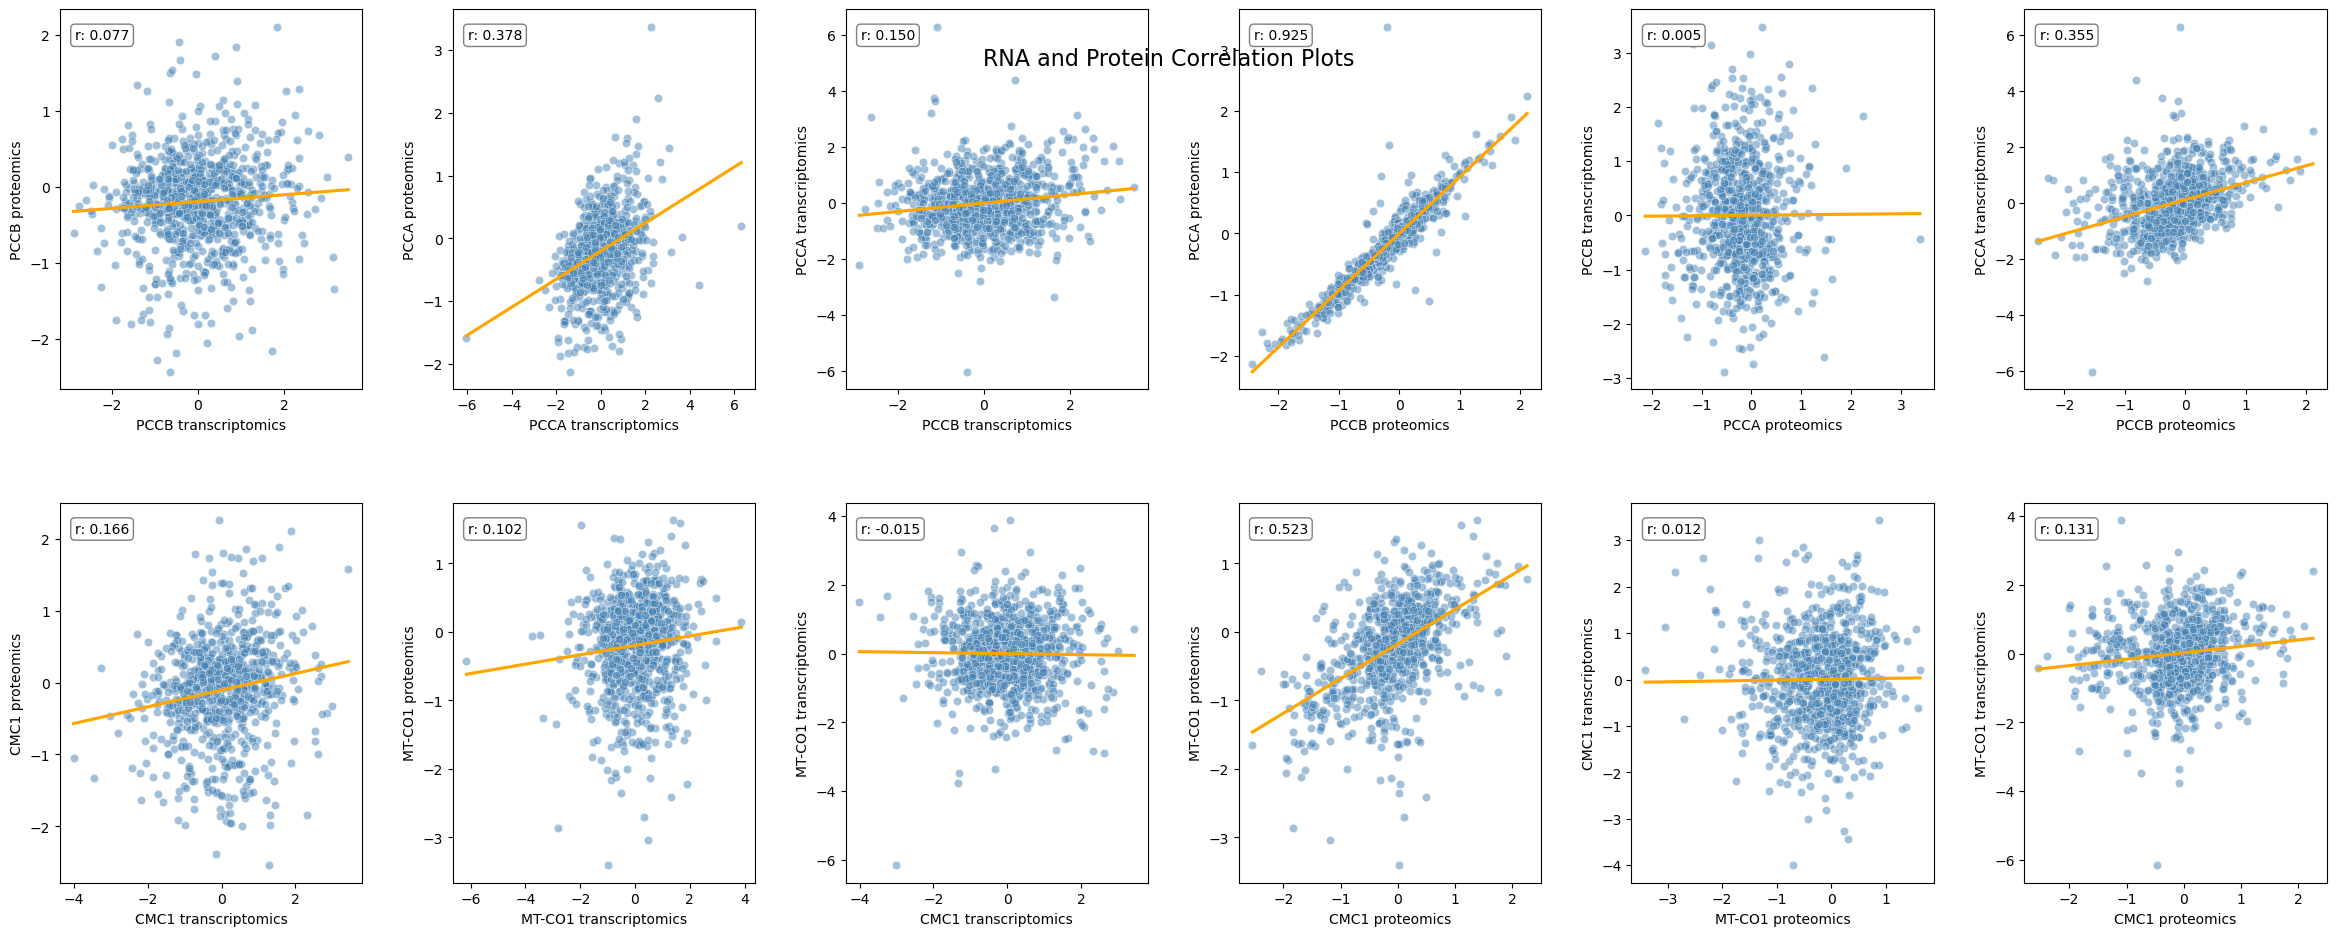

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def make_rna_protein_scatter(df, genes, save_path=None):
    num_genes = len(genes)
    # Adjust figsize to change the individual plot size
    fig, axes = plt.subplots(num_genes, 6, figsize=(24, 5 * num_genes))  # Increased width to 24 and adjusted height

    for index, (gene1, gene2) in enumerate(genes):
        cols = {
            'g1_t': f'{gene1}_transcriptomics',
            'g1_p': f'{gene1}_proteomics',
            'g2_t': f'{gene2}_transcriptomics',
            'g2_p': f'{gene2}_proteomics'
        }

        plot_index = [
            ('g1_t', 'g1_p', 0),
            ('g2_t', 'g2_p', 1),
            ('g1_t', 'g2_t', 2),
            ('g1_p', 'g2_p', 3),
            ('g2_p', 'g1_t', 4),
            ('g1_p', 'g2_t', 5)
        ]

        for x_key, y_key, j in plot_index:
            ax = axes[index, j]
            x_col = cols[x_key]
            y_col = cols[y_key]

            filtered_df = df[[x_col, y_col]].dropna()
            sns.scatterplot(x=x_col, y=y_col, data=filtered_df, ax=ax, color='steelblue', alpha=0.5)
            sns.regplot(x=x_col, y=y_col, data=filtered_df, ax=ax, scatter=False, color='orange', ci=None)

            correlation, _ = pearsonr(filtered_df[x_col], filtered_df[y_col])
            ax.annotate(f'r: {correlation:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                        bbox=dict(boxstyle='round', fc='white', ec='gray'))

            ax.set_xlabel(f'{x_col.split("_")[0]} {x_col.split("_")[1]}')
            ax.set_ylabel(f'{y_col.split("_")[0]} {y_col.split("_")[1]}')

    plt.tight_layout(pad=3.0)  # Adjust layout to make more room between plots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the space between plots
    plt.suptitle('RNA and Protein Correlation Plots', fontsize=16, y=0.92)  # Adjust title positioning

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save the figure as a high-resolution image

    return fig

# Call the function with a path to save the figure
fig = make_rna_protein_scatter(z_df_cleaned, [('PCCB', 'PCCA'), ('CMC1', 'MT-CO1')], save_path='rna_protein_correlation.png')
plt.show()


In [7]:
result

{'model': RandomForestRegressor(max_depth=4, n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=2),
 'metrics':       corr_train  corr_test  r2_train   r2_test  num_obs  num_features  \
 PCCB    0.396324   0.013715  0.095546 -0.023639      752             1   
 
          nrmse  baseline_nrmse  
 PCCB  0.301488        0.300653  }

In [12]:
# This worked in string earlier
protein_of_interest = 'A1BG'
res = tm.learn_one_protein(protein_to_do=protein_of_interest)
res

{'model': RandomForestRegressor(max_depth=4, n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=2),
 'metrics':       corr_train  corr_test  r2_train   r2_test  num_obs  num_features  \
 A1BG    0.406749  -0.000405  0.109777 -0.035277      752             1   
 
          nrmse  baseline_nrmse  
 A1BG  0.314749        0.313041  }

In [24]:
#tm = train_model.LearnCPTAC(z_df_fixed)
tm.train_method = 'forest'
tm.included_features = 'single'

In [ ]:
#oob_scorebool or callable, default=False
#Whether to use out-of-bag samples to estimate the generalization score. By default, r2_score is used. Provide a callable with signature metric(y_true, y_pred) to use a custom metric. Only available if bootstrap=True.

In [6]:
rf = result['model']


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Example of configuring the model
rf = RandomForestRegressor(n_estimators=500, max_depth=4, oob_score=True, random_state=2)

# Fit the model
rf.fit(x_train, y_train)

# Access OOB predictions
oob_predictions = rf.oob_prediction_
print("OOB Predictions:", oob_predictions)

OOB Predictions: [-0.14443579 -0.82347041 -0.16037052 -0.29394492 -0.16462805 -0.24431059
 -0.3527846  -0.09295937 -0.16250422 -0.51127603 -0.23231253 -0.15606921
 -0.14760522 -0.23129934 -0.26916828 -0.13830408 -0.15228366 -0.19497925
 -0.2235013  -0.16301512 -0.17695959 -0.21791803 -0.16362384 -0.17813735
 -0.12234981 -0.31930456 -0.14623614 -0.20854399 -0.14374714 -0.12309482
 -0.16090781  0.14910631 -0.20731622 -0.14423688 -0.23657858 -0.16191743
 -0.06691251 -0.14718547 -0.24169871 -0.18854808 -0.18837711 -0.22219957
 -0.15439882 -0.20578264 -0.24166219 -0.17464368 -0.88370505 -0.16185979
 -0.24364003 -0.14508416 -0.18578287 -0.13375777 -0.17656138 -0.16249204
 -0.18020178 -0.20836259 -0.08759035 -0.85584621 -0.15711248 -0.19534378
 -0.16743137 -0.24275182 -0.52314175 -0.17924516 -0.21849115 -0.1938382
 -0.48547731 -0.06854896 -0.16090173 -0.20192503 -0.15799048 -0.15199535
 -0.18417652 -0.18003739 -0.16275834 -0.14374481  0.02101207 -0.16489074
 -0.2056924  -0.29035299 -0.1539398

In [7]:
#Note: oob means Out of bag - this is sourced from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score
#the oob prediction is array of shape = [n_samples] Prediction computed with out-of-bag estimate on the training set.
rf.oob_prediction_


array([-0.1143454 , -0.41246618, -0.15817824, -0.3496515 , -0.15094969,
       -0.19038798, -0.34727716, -0.20131061, -0.19673331, -0.37966162,
       -0.16564079, -0.20235455, -0.15586096, -0.1813048 , -0.19095305,
       -0.20110826, -0.15306619, -0.42635762, -0.27182471, -0.13369339,
       -0.18675983, -0.18340895, -0.14625878, -0.09643343, -0.4578512 ,
       -0.2761012 , -0.1404355 , -0.17800309, -0.13552967, -0.12087211,
       -0.15015135, -0.20654442, -0.17665942, -0.15571168, -0.18279921,
       -0.1695534 , -0.33956022, -0.131568  , -0.19179672, -0.18798731,
       -0.19224718, -0.1996733 , -0.19395334, -0.17782588, -0.16877131,
       -0.18892035, -0.39427343, -0.14946094, -0.18790794, -0.13521932,
       -0.1889319 , -0.12764154, -0.19934905, -0.11561278, -0.18816882,
       -0.16601331, -0.24887456, -0.41408151,  0.06674773, -0.18473719,
       -0.14286336, -0.1897441 , -0.35326538, -0.10983415, -0.17956034,
       -0.18405866, -0.43293555, -0.45913754, -0.14389207, -0.24

In [8]:
protein_of_interest = 'A1BG'
x_train, x_test, y_train, y_test = tm.get_train_test(protein_to_do=protein_of_interest)


In [44]:
# Filter columns in z_df where column names contain 'A1BG'
a1bg_columns_df = z_df_highest.filter(like='A1BG')

# Display the filtered columns
print(a1bg_columns_df)

     A1BG_ENST00000263100.8_ENSG00000121410.12_transcriptomics  \
0                                            -0.308263           
1                                            -0.308263           
2                                            -0.308263           
3                                                  NaN           
4                                             1.618380           
..                                                 ...           
940                                          -0.227921           
941                                          -0.227921           
942                                          -0.227921           
943                                                NaN           
944                                                NaN           

     A1BG-AS1_ENST00000593374.5_ENSG00000268895.6_transcriptomics  \
0                                            -0.100504              
1                                            -0.100504              


In [9]:

x_train
x_train['pred'] = rf.oob_prediction_
x_train

,A1BG_transcriptomics,pred
621,0.102486,-0.114345
188,-1.082807,-0.412466
795,-0.718449,-0.158178
698,1.764586,-0.349652
654,-0.089832,-0.150950
...,...,...
538,0.590832,-0.191015
588,0.031742,-0.095950
497,1.306882,-0.350190
531,-1.827838,-0.197837


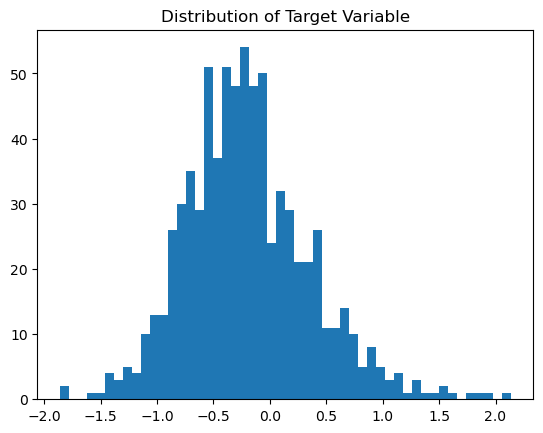

In [22]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=50)
plt.title('Distribution of Target Variable')
plt.show()


In [11]:
#let's try to compare

# Print the entire index of the x_train DataFrame
print("Full list of Patient_IDs in x_train index:")
print(x_train.index.tolist())  # .tolist() converts the index to a list for easier reading

# Replace this list with the actual Patient IDs you want to filter by nixing the prefix OV or BRX
patient_ids = [
    '01OV029', '017OV030', '01OV018', '11BR036',
    '01OV023', '04OV045', '04OV001', '17OV033',
    '02OV023', '11BR023'
]

# Assuming x_train has 'Patient_ID' set as the index
filtered_x_train = x_train[x_train.index.isin(patient_ids)]

# View the filtered DataFrame
print("\nFiltered x_train DataFrame:")
print(filtered_x_train)

Full list of Patient_IDs in x_train index:
[621, 188, 795, 698, 654, 509, 782, 280, 418, 107, 288, 286, 385, 933, 819, 616, 421, 89, 80, 272, 923, 284, 30, 10, 319, 182, 767, 825, 921, 622, 858, 157, 445, 306, 77, 534, 1, 548, 175, 860, 883, 668, 443, 793, 4, 506, 198, 116, 460, 517, 204, 840, 174, 257, 371, 71, 213, 202, 328, 869, 119, 177, 736, 624, 500, 13, 227, 248, 859, 305, 472, 927, 399, 569, 940, 605, 129, 90, 705, 126, 926, 163, 111, 664, 720, 555, 392, 689, 688, 291, 448, 72, 2, 562, 356, 803, 12, 318, 695, 375, 108, 444, 316, 181, 309, 893, 711, 738, 42, 313, 570, 383, 728, 311, 867, 530, 818, 529, 334, 435, 920, 865, 55, 742, 216, 696, 40, 441, 637, 341, 673, 178, 176, 400, 58, 780, 741, 16, 345, 662, 849, 649, 544, 646, 467, 792, 676, 872, 366, 29, 900, 902, 922, 787, 376, 436, 203, 32, 844, 449, 156, 580, 335, 778, 576, 912, 364, 3, 572, 130, 863, 343, 788, 876, 322, 222, 329, 864, 456, 113, 48, 289, 563, 206, 892, 285, 704, 225, 556, 120, 834, 457, 404, 889, 221, 268, 17

In [23]:
import re

# List of patient IDs that you provided
patient_ids = [
    'OV01OV029', 'OV17OV030', 'OV01OV018', 'BRX11BR036',
    'OV01OV023', 'OV04OV045', 'OV04OV001', 'OV17OV033',
    'OV02OV023', 'BRX11BR023'
]

# Function to remove prefixes 'OV' or 'BRX'
def remove_prefix(patient_id):
    # Using a regular expression to remove the leading prefixes 'OV' or 'BRX'
    return re.sub(r'^(OV|BRX)', '', patient_id)

# Create a new list of patient IDs without the 'OV' or 'BRX' prefixes
cleaned_patient_ids = [remove_prefix(pid) for pid in patient_ids]

# Print the cleaned patient IDs
print("List of Patient IDs without prefixes 'OV' or 'BRX':")
print(cleaned_patient_ids)

# Assuming x_train has 'Patient_ID' set as the index
filtered_x_train = x_train[x_train.index.isin(cleaned_patient_ids)]

# View the filtered DataFrame
print("\nFiltered x_train DataFrame:")
print(filtered_x_train)

List of Patient IDs without prefixes 'OV' or 'BRX':
['01OV029', '17OV030', '01OV018', '11BR036', '01OV023', '04OV045', '04OV001', '17OV033', '02OV023', '11BR023']

Filtered x_train DataFrame:
Empty DataFrame
Columns: [A1BG_transcriptomics, pred]
Index: []


C:\Users\borkana\AppData\Local\Temp\ipykernel_28816\2010568742.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


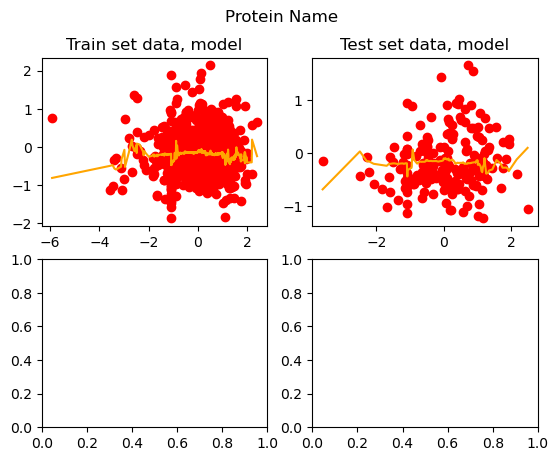

In [10]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Protein Name')



axs[0, 0].scatter(x_train[protein_of_interest + '_transcriptomics'], y_train, color = 'red')
# axs[0, 0].plot(x_train[protein_of_interest + '_transcriptomics'], rf.oob_prediction_, color = 'blue')
axs[0, 0].plot(x_train.sort_values(by=protein_of_interest + '_transcriptomics')[protein_of_interest + '_transcriptomics'],
               x_train.sort_values(by=protein_of_interest + '_transcriptomics')['pred'], color = 'orange')
axs[0, 0].title.set_text("Train set data, model")

axs[0, 1].scatter(x_test, y_test, color = 'red')
# axs[0, 1].plot(x_test, linreg_model.predict(x_test), color = 'blue')
axs[0, 1].plot(x_test.sort_values(by=protein_of_interest + '_transcriptomics'),
               rf.predict(x_test.sort_values(by=protein_of_interest + '_transcriptomics')), color = 'orange')
axs[0, 1].title.set_text("Test set data, model")

fig.show()
